In the first python cell, we store the data in a pandas dataframe. For initial cleanup, we will drop any rows with missing values. Then we select the columns that we expect will be used during this project.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "../df_matches.csv"

df = pd.read_csv(path, sep=',')

# Drop rows with missing values
df = df.dropna(subset=['match_date','match_conceded', 'coach1_CR', 'coach2_CR'])
relevant = ["match_id", "division_name", "match_date", "match_time", "match_conceded", 
            "team1_coach_id", "team1_race_name", "team2_coach_id", "team2_race_name", 
            "team1_score", "team2_score","team1_win","team2_win","mirror_match", 
            "coach1_ranking","coach2_ranking","coach1_CR","coach2_CR"]
df = df[relevant]

df.head()

,match_id,division_name,match_date,match_time,match_conceded,team1_coach_id,team1_race_name,team2_coach_id,team2_race_name,team1_score,team2_score,team1_win,team2_win,mirror_match,coach1_ranking,coach2_ranking,coach1_CR,coach2_CR
28,4216288,Blackbox,2020-08-01,23:54:36,Team2,240086,Chaos Dwarf,70391,Amazon,1,0,1,-1,0,CR 158.78 (+0.19) Super Star Dacrav,Dalfort Experienced CR 134.68 (-0.19),158.78,134.68
86,4216346,Blackbox,2020-08-02,02:52:13,Team1,253902,Chaos Dwarf,250323,Orc,0,1,-1,1,0,CR 154.19 (-0.79) Super Star Foho,Ferick Super Star CR 168.68 (+0.79),154.19,168.68
165,4216425,Blackbox,2020-08-02,11:22:53,Team1,245963,Dark Elf,252363,Skaven,0,2,-1,1,0,CR 153.5 (-1.46) Super Star Kikaze,Ross12 Emerging Star CR 149.5 (+1.46),153.50,149.50
242,4216502,Blackbox,2020-08-02,16:23:36,Team1,253367,Chaos Chosen,221100,Orc,0,1,-1,1,0,CR 152.33 (-0.71) Star kanawa,luxyluxo Super Star CR 161.74 (+0.71),152.33,161.74
271,4216531,Ranked,2020-08-02,17:38:52,Team2,247586,Human,245078,Underworld Denizens,1,0,1,-1,0,CR 157.4 (+0.67) Super Star Midas_Touch,Swampserpent Emerging Star CR 148.99 (-0.67),157.40,148.99


Next we will investigate how some of the data is distributed. For the 8103 matches we have plotted how many wins each individual player has. We can see that the distribution is right-skewed, with most players having a small number of wins. We can also see that there are a few players with a large number of wins.\
Next we plot the number of wins for each race in the dataset. We can see that some races definitely has more wins than others.

Total matches:  8103


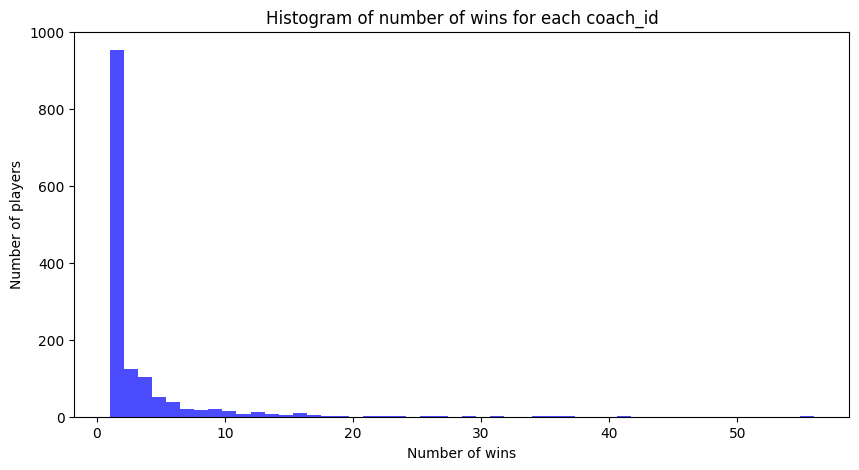

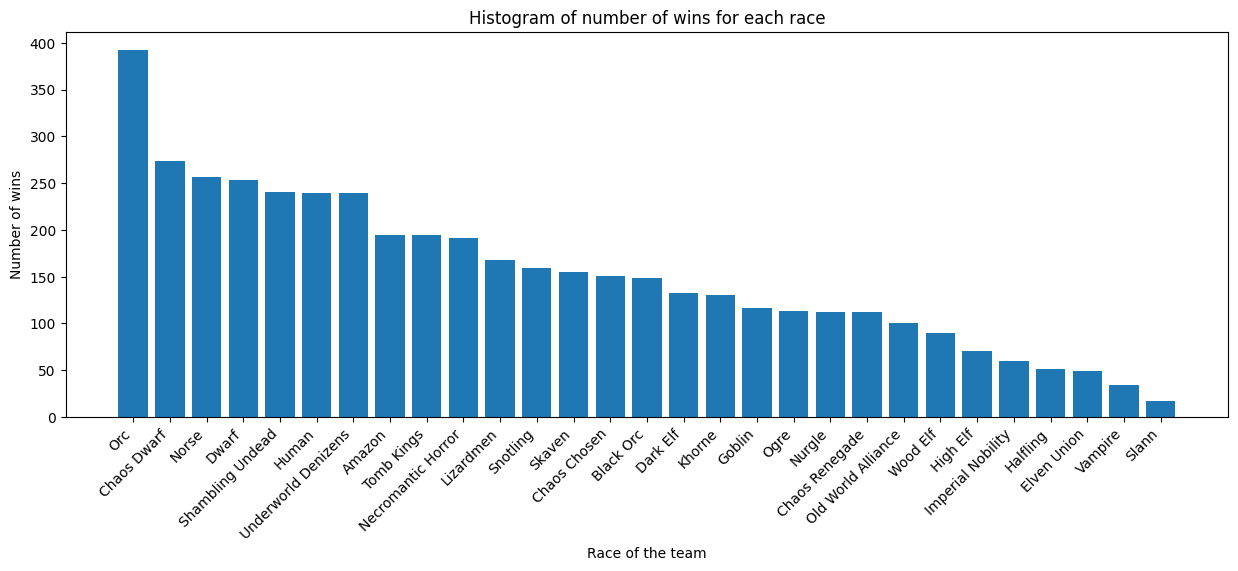

In [35]:
total_matches = df.shape[0]
print("Total matches: ", total_matches)

# make a new dataframe containing the unique coach ids and counts the number of times they won
coach1_wins = df[df["team1_win"] == 1].groupby("team1_coach_id").size().reset_index(name='wins')
coach2_wins = df[df["team2_win"] == 1].groupby("team2_coach_id").size().reset_index(name='wins')

# merge the dataframes and plot a histogram of number of wins for each coach_id
coach_wins = pd.concat([coach1_wins, coach2_wins])
coach_wins = coach_wins.groupby("team1_coach_id").sum().reset_index()
coach_wins = coach_wins.sort_values(by="wins", ascending=False)
coach_wins = coach_wins.reset_index(drop=True)

# plot a histogram of number of wins for each coach_id
plt.figure(figsize=(10,5))
plt.hist(coach_wins["wins"], bins=50, color='blue', alpha=0.7)
plt.xlabel("Number of wins")
plt.ylabel("Number of players")
plt.title("Histogram of number of wins for each coach_id")
plt.show()

# do the same but grouping by the race of the team instead of the coach
coach1_wins_race = df[df["team1_win"] == 1].groupby("team1_race_name").size().reset_index(name='wins')
coach2_wins_race = df[df["team2_win"] == 1].groupby("team2_race_name").size().reset_index(name='wins')

coach_wins_race = pd.concat([coach1_wins_race, coach2_wins_race])
coach_wins_race = coach_wins_race.groupby("team1_race_name").sum().reset_index()
coach_wins_race = coach_wins_race.sort_values(by="wins", ascending=False)
coach_wins_race = coach_wins_race.reset_index(drop=True)

plt.figure(figsize=(15,5))
plt.bar(coach_wins_race['team1_race_name'], coach_wins_race['wins'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Race of the team")
plt.ylabel("Number of wins")
plt.title("Histogram of number of wins for each race")
plt.show()